In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


# Data Generation

In [102]:
X = np.abs(6 * np.random.rand(200, 1) - 3)
y =  (5 * X**2) + np.random.randn(200, 1) * 3

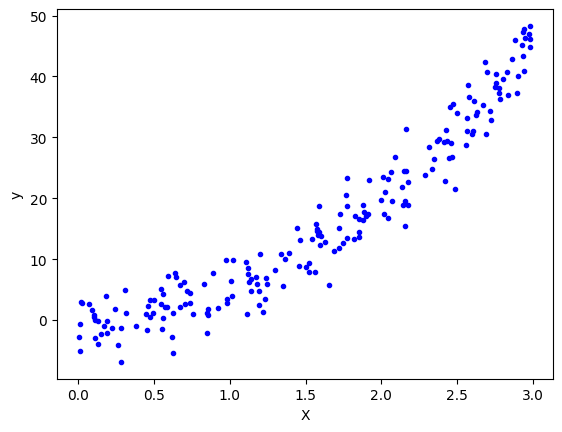

In [103]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Applying Linear Regression Directly

In [128]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("MSE : ",mean_squared_error(y_test,y_pred))
print("R2_Score : ",r2_score(y_test,y_pred))

MSE :  25.405667574650415
R2_Score :  0.8457828097234479


# Visualizing the LR line

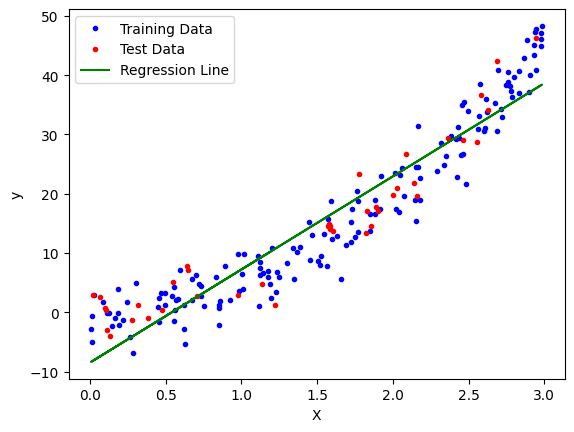

In [141]:
plt.plot(X_train, y_train,'b.',label='Training Data')
plt.plot(X_test,y_test,'r.',label='Test Data')
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X_train,lr.predict(X_train),'green',label = 'Regression Line')
plt.legend()
plt.show()

# Intercept and Coef Values of LR

In [135]:
lr.intercept_, lr.coef_

(array([-8.49153276]), array([[15.70795013]]))

# Applying Polynomial Features

In [136]:
pf = PolynomialFeatures(degree=3,include_bias=False)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

# Reapplying LR after applying Polynomial Features

In [137]:
lr_pf = LinearRegression()
lr_pf.fit(X_train_pf,y_train)
y_pred1 = lr_pf.predict(X_test_pf)
print("MSE : ",mean_squared_error(y_test,y_pred1))
print('R2_Score : ',r2_score(y_test,y_pred1))

MSE :  9.835186810926267
R2_Score :  0.9402985624617297


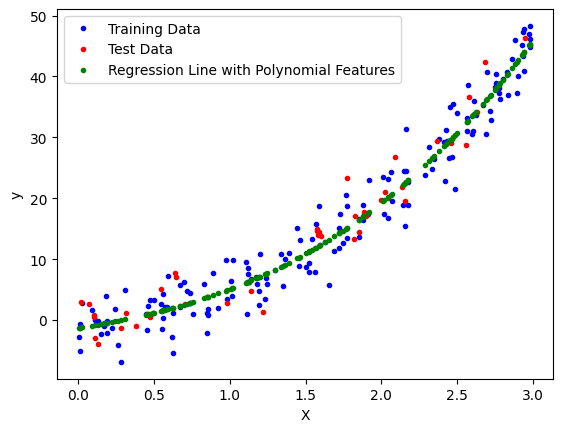

In [152]:
plt.plot(X_train, y_train,'b.',label='Training Data')
plt.plot(X_test,y_test,'r.',label='Test Data')
plt.xlabel("X")
plt.ylabel("y")
plt.plot(X_train,lr_pf.predict(X_train_pf),'g.',label = 'Regression Line with Polynomial Features')
plt.legend()
plt.show()

# Trying with different degrees

In [153]:
def polynomial_regression(X,y,degree=5):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  pf = PolynomialFeatures(degree=degree,include_bias=False)
  X_train_pf = pf.fit_transform(X_train)
  X_test_pf = pf.transform(X_test)
  lr_pf = LinearRegression()
  lr_pf.fit(X_train_pf,y_train)
  y_pred1 = lr_pf.predict(X_test_pf)
  print('*****************With degree {}***********'.format(degree))
  print('Intercept : ',lr_pf.intercept_)
  print('Coef : ',lr_pf.coef_)
  print("MSE : ",mean_squared_error(y_test,y_pred1))
  print('R2_Score : ',r2_score(y_test,y_pred1))
  plt.plot(X_train, y_train,'b.',label='Training Data')
  plt.plot(X_test,y_test,'r.',label='Test Data')
  plt.xlabel("X")
  plt.ylabel("y")
  plt.plot(X_train,lr_pf.predict(X_train_pf),'g.',label = 'Regression Line with Polynomial Features')
  plt.legend()
  plt.show()


*****************With degree 1***********
Intercept :  [-8.49153276]
Coef :  [[15.70795013]]
MSE :  25.405667574650415
R2_Score :  0.8457828097234479


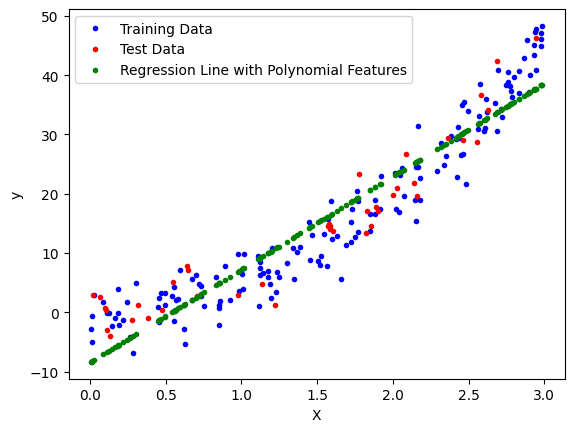

*****************With degree 6***********
Intercept :  [-1.07117235]
Coef :  [[  1.07656978  13.84132682 -20.15308343  16.07677651  -5.55276228
    0.70209846]]
MSE :  9.688128343225415
R2_Score :  0.9411912350761595


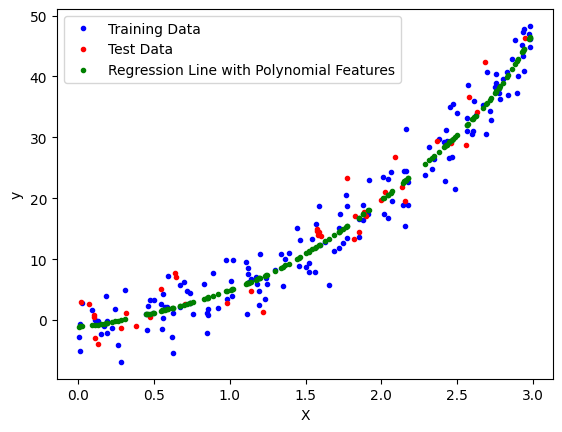

*****************With degree 11***********
Intercept :  [-2.21643624]
Coef :  [[ 6.46629103e+01 -6.24273844e+02  2.65579379e+03 -6.04915706e+03
   8.33396593e+03 -7.36160800e+03  4.26971141e+03 -1.61907805e+03
   3.86617218e+02 -5.27605356e+01  3.13746040e+00]]
MSE :  9.506396273859655
R2_Score :  0.9422943829874821


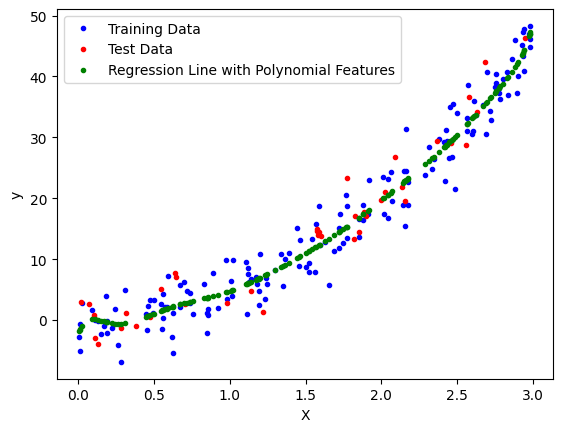

*****************With degree 16***********
Intercept :  [-4.84866367]
Coef :  [[ 3.04845091e+02 -4.44156721e+03  2.85399608e+04 -1.01286796e+05
   2.20333059e+05 -3.05638589e+05  2.63805491e+05 -1.14436691e+05
  -2.30261830e+04  7.11014110e+04 -5.27175925e+04  2.27968429e+04
  -6.33208226e+03  1.11710595e+03 -1.14498802e+02  5.20820969e+00]]
MSE :  9.95462113167482
R2_Score :  0.9395735736255061


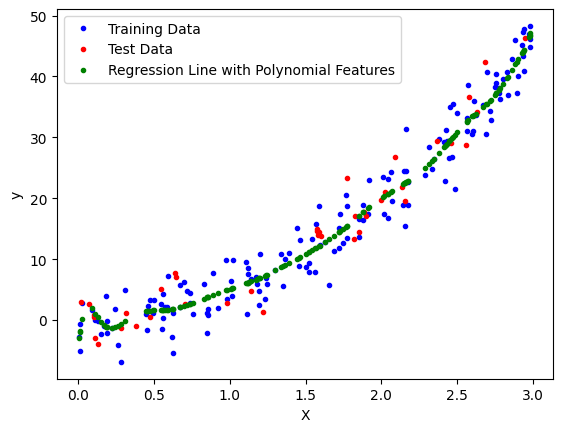

In [154]:
for i in range(1,20,5):
  polynomial_regression(X,y,i)

# Trying with bias=True

In [155]:
def polynomial_regression(X,y,degree=5):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  pf = PolynomialFeatures(degree=degree,include_bias=True)
  X_train_pf = pf.fit_transform(X_train)
  X_test_pf = pf.transform(X_test)
  lr_pf = LinearRegression()
  lr_pf.fit(X_train_pf,y_train)
  y_pred1 = lr_pf.predict(X_test_pf)
  print('*****************With degree {}***********'.format(degree))
  print('Intercept : ',lr_pf.intercept_)
  print('Coef : ',lr_pf.coef_)
  print("MSE : ",mean_squared_error(y_test,y_pred1))
  print('R2_Score : ',r2_score(y_test,y_pred1))
  plt.plot(X_train, y_train,'b.',label='Training Data')
  plt.plot(X_test,y_test,'r.',label='Test Data')
  plt.xlabel("X")
  plt.ylabel("y")
  plt.plot(X_train,lr_pf.predict(X_train_pf),'y.',label = 'Regression Line with Polynomial Features')
  plt.legend()
  plt.show()


*****************With degree 1***********
Intercept :  [-8.49153276]
Coef :  [[ 0.         15.70795013]]
MSE :  25.405667574650415
R2_Score :  0.8457828097234479


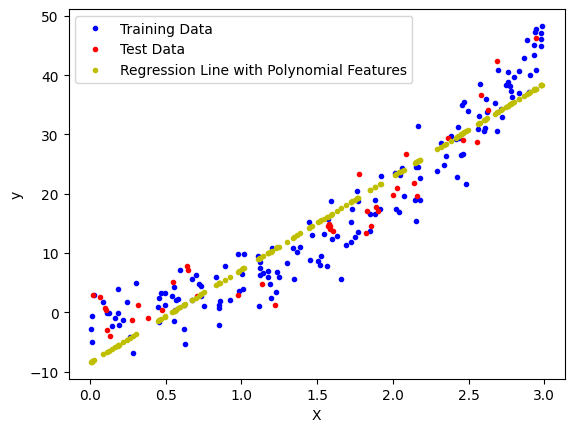

*****************With degree 8***********
Intercept :  [-1.21780313]
Coef :  [[  0.           3.89909196   3.40298389  -7.4875922   13.85693197
  -12.02914992   5.88530322  -1.52595862   0.16098485]]
MSE :  9.831951425924029
R2_Score :  0.9403182018584525


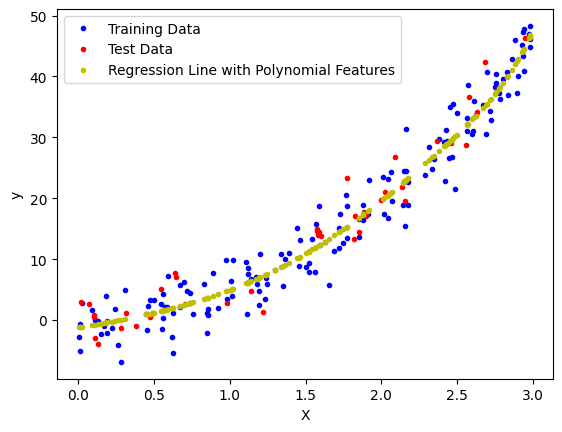

*****************With degree 15***********
Intercept :  [-5.254485]
Coef :  [[ 0.00000000e+00  3.48758844e+02 -5.38107667e+03  3.73603610e+04
  -1.47307754e+05  3.70605449e+05 -6.35041488e+05  7.70471504e+05
  -6.76845412e+05  4.34974875e+05 -2.04412973e+05  6.94099496e+04
  -1.65671576e+04  2.63506672e+03 -2.50618140e+02  1.07774969e+01]]
MSE :  9.873834387510133
R2_Score :  0.9400639643881208


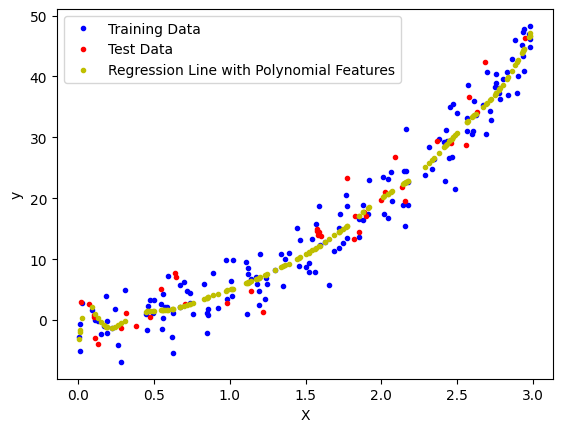

*****************With degree 22***********
Intercept :  [-3.71830915]
Coef :  [[ 0.00000000e+00  1.88208583e+02 -2.21219893e+03  1.04470513e+04
  -2.30288955e+04  2.09266233e+04  3.76258625e+03 -1.68227430e+04
  -2.06967715e+03  1.39023969e+04  2.92363377e+03 -1.21444379e+04
  -2.46733850e+03  1.16470699e+04 -1.55003761e+03 -1.03836929e+04
   1.15844284e+04 -6.54315486e+03  2.30891966e+03 -5.31266260e+02
   7.79898489e+01 -6.66504545e+00  2.53164828e-01]]
MSE :  10.097162255994224
R2_Score :  0.938708322136766


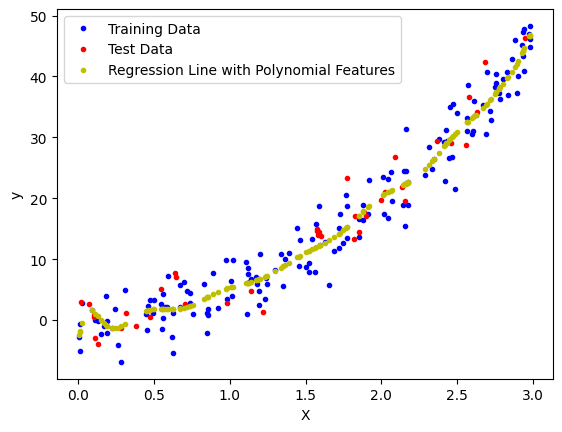

In [156]:
for i in range(1,25,7):
  polynomial_regression(X,y,i)